In [1]:
print("Lord Balaji")

Lord Balaji


**1.Import Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**2.Load Dataset**

In [3]:
df = pd.read_csv("E:\Python_Vedeo\DataSets\Brest Cancer\BreastCancer.csv")

In [5]:
df.shape

(699, 12)

In [6]:
df.head()

,Unnamed: 0,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
0,1,1000025,5,1,1,1,2,1.0,3,1,1,benign
1,2,1002945,5,4,4,5,7,10.0,3,2,1,benign
2,3,1015425,3,1,1,1,2,2.0,3,1,1,benign
3,4,1016277,6,8,8,1,3,4.0,3,7,1,benign
4,5,1017023,4,1,1,3,2,1.0,3,1,1,benign


**3.Data Analysis**

In [16]:
df.isnull().sum()/df.shape[0]*100

Unnamed: 0         0.000000
Id                 0.000000
Cl.thickness       0.000000
Cell.size          0.000000
Cell.shape         0.000000
Marg.adhesion      0.000000
Epith.c.size       0.000000
Bare.nuclei        2.288984
Bl.cromatin        0.000000
Normal.nucleoli    0.000000
Mitoses            0.000000
Class              0.000000
dtype: float64

In [18]:
df2 = df.dropna()

In [19]:
df2.isnull().sum().sum()

0

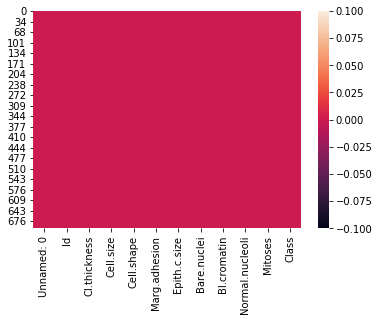

In [23]:
sns.heatmap(df2.isnull())

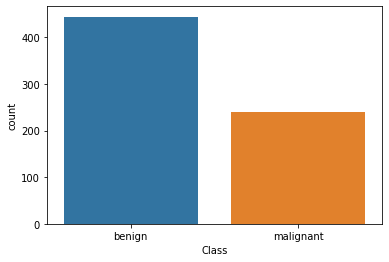

In [24]:
sns.countplot(df2['Class'])

In [26]:
df2.columns

Index(['Unnamed: 0', 'Id', 'Cl.thickness', 'Cell.size', 'Cell.shape',
       'Marg.adhesion', 'Epith.c.size', 'Bare.nuclei', 'Bl.cromatin',
       'Normal.nucleoli', 'Mitoses', 'Class'],
      dtype='object')

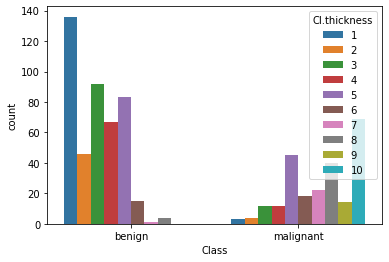

In [37]:
sns.countplot('Class', hue ='Cl.thickness', data = df2)

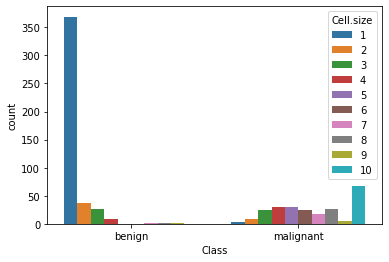

In [38]:
sns.countplot('Class', hue ='Cell.size', data = df2)

In [31]:
df2['Cell.shape'].unique()

array([ 1,  4,  8, 10,  2,  3,  5,  6,  7,  9], dtype=int64)

In [32]:
df2['Marg.adhesion'].unique()

array([ 1,  5,  3,  8, 10,  4,  6,  2,  9,  7], dtype=int64)

**One Hot encoding**

In [39]:
dummies = [pd.get_dummies(df2['Cl.thickness'], prefix = 'Cl.thickness', drop_first = True),
          pd.get_dummies(df2['Cell.size'], prefix = 'Cell.size', drop_first = True),
          pd.get_dummies(df2['Cell.shape'], prefix = 'Cell.shape', drop_first = True),
          pd.get_dummies(df2['Marg.adhesion'], prefix = 'Marg.adhesion', drop_first = True),
          pd.get_dummies(df2['Epith.c.size'], prefix = 'Epith.c.size', drop_first = True),
          pd.get_dummies(df2['Bare.nuclei'], prefix = 'Bare.nuclei', drop_first = True),
          pd.get_dummies(df2['Bl.cromatin'], prefix = 'Bl.cromatin', drop_first = True),
          pd.get_dummies(df2['Normal.nucleoli'], prefix = 'Normal.nucleoli', drop_first = True),
          pd.get_dummies(df2['Mitoses'], prefix = 'Mitoses', drop_first = True),
          pd.get_dummies(df2['Class'], prefix = 'Class', drop_first = True)]

In [44]:
df3 = pd.concat(dummies, axis = 1, in place = True)

SyntaxError: invalid syntax (<ipython-input-44-a04ce6f38421>, line 1)

In [45]:
df3.head()

,Cl.thickness_2,Cl.thickness_3,Cl.thickness_4,Cl.thickness_5,Cl.thickness_6,Cl.thickness_7,Cl.thickness_8,Cl.thickness_9,Cl.thickness_10,Cell.size_2,...,Normal.nucleoli_10,Mitoses_2,Mitoses_3,Mitoses_4,Mitoses_5,Mitoses_6,Mitoses_7,Mitoses_8,Mitoses_10,Class_malignant
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Split Data into x and y veraible**

In [46]:
df3.keys()

Index(['Cl.thickness_2', 'Cl.thickness_3', 'Cl.thickness_4', 'Cl.thickness_5',
       'Cl.thickness_6', 'Cl.thickness_7', 'Cl.thickness_8', 'Cl.thickness_9',
       'Cl.thickness_10', 'Cell.size_2', 'Cell.size_3', 'Cell.size_4',
       'Cell.size_5', 'Cell.size_6', 'Cell.size_7', 'Cell.size_8',
       'Cell.size_9', 'Cell.size_10', 'Cell.shape_2', 'Cell.shape_3',
       'Cell.shape_4', 'Cell.shape_5', 'Cell.shape_6', 'Cell.shape_7',
       'Cell.shape_8', 'Cell.shape_9', 'Cell.shape_10', 'Marg.adhesion_2',
       'Marg.adhesion_3', 'Marg.adhesion_4', 'Marg.adhesion_5',
       'Marg.adhesion_6', 'Marg.adhesion_7', 'Marg.adhesion_8',
       'Marg.adhesion_9', 'Marg.adhesion_10', 'Epith.c.size_2',
       'Epith.c.size_3', 'Epith.c.size_4', 'Epith.c.size_5', 'Epith.c.size_6',
       'Epith.c.size_7', 'Epith.c.size_8', 'Epith.c.size_9', 'Epith.c.size_10',
       'Bare.nuclei_2.0', 'Bare.nuclei_3.0', 'Bare.nuclei_4.0',
       'Bare.nuclei_5.0', 'Bare.nuclei_6.0', 'Bare.nuclei_7.0',
       'B

In [47]:
X= df3.drop(columns = 'Class_malignant')

In [48]:
y = df3['Class_malignant']

In [49]:
X.head()

,Cl.thickness_2,Cl.thickness_3,Cl.thickness_4,Cl.thickness_5,Cl.thickness_6,Cl.thickness_7,Cl.thickness_8,Cl.thickness_9,Cl.thickness_10,Cell.size_2,...,Normal.nucleoli_9,Normal.nucleoli_10,Mitoses_2,Mitoses_3,Mitoses_4,Mitoses_5,Mitoses_6,Mitoses_7,Mitoses_8,Mitoses_10
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class_malignant, dtype: uint8

In [52]:
X.shape, y.shape

((683, 80), (683,))

**Train the data**

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size = 0.25, random_state = 42)

In [55]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((512, 80), (171, 80), (512,), (171,))

**Build Random forest Model**

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
random_forest_model = RandomForestClassifier()

In [58]:
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [59]:
random_forest_model.score(X_test, y_test)

0.935672514619883

**Predict the model**

In [60]:
predict_values = random_forest_model.predict(X_test)

**Evaluate the model**

In [61]:
from sklearn.metrics import accuracy_score

In [62]:
accuracy_score = accuracy_score(y_test, predict_values)

In [64]:
accuracy_score*100

93.56725146198829

**Build Model with entropy**

In [65]:
random_forest_model_entropy = RandomForestClassifier(criterion = 'entropy')

In [66]:
random_forest_model_entropy.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [68]:
entropy_prediction = random_forest_model_entropy.predict(X_test)

In [70]:
from sklearn.metrics import confusion_matrix

In [71]:
metrics = confusion_matrix(y_test, entropy_prediction)

In [72]:
metrics

array([[101,   2],
       [  7,  61]], dtype=int64)

In [75]:
dig = sum(metrics.diagonal())
dig

162

In [76]:
total = metrics.sum()
total

171

In [77]:
accuracy = (dig/total)*100

In [80]:
accuracy.round(2)

94.74